In [1]:
import os
import itk
import itkwidgets

import matplotlib.pyplot as plt
import parent
import test
from test.test_all import TEST_DATA_DIR
from test.test_all import download_test_data
download_test_data()

In [2]:
test_volume = itk.imread(os.path.join(TEST_DATA_DIR, "colab_case/image_preprocessed.nii.gz"))

In [3]:
itkwidgets.view(test_volume)

Viewer(geometries=[], gradient_opacity=0.22, point_sets=[], rendered_image=<itk.itkImagePython.itkImageF3; pro…

In [4]:
import oai_analysis_2
obj = oai_analysis_2.AnalysisObject()
FC, TC = obj.segment(test_volume)

Loading parameter file = /home/pranjal.sahu/OAI/OAI_analysis_2/data/segmentation_train_config.pth.tar
=> loading checkpoint '/home/pranjal.sahu/OAI/OAI_analysis_2/data/segmentation_model.pth.tar'
=> loaded checkpoint '/home/pranjal.sahu/OAI/OAI_analysis_2/data/segmentation_model.pth.tar' (epoch 600)


In [5]:
itkwidgets.view(FC)

Viewer(geometries=[], gradient_opacity=0.22, point_sets=[], rendered_image=<itk.itkImagePython.itkImageD3; pro…

In [38]:
# Read the dicom image series

import itk
import glob
import os

dirName = '/media/pranjal.sahu/moredata/OAI-MATT/20051007/10101101'

def image_normalize(image, window_min_perc, window_max_perc, output_min, output_max):
    window_rescale = itk.IntensityWindowingImageFilter[type(image), type(image)].New()
    image_array = itk.GetArrayFromImage(image)
    
    window_min = np.percentile(image_array, window_min_perc)
    window_max = np.percentile(image_array, window_max_perc)
    
    window_rescale.SetInput(image)
    window_rescale.SetOutputMaximum(output_max)
    window_rescale.SetOutputMinimum(output_min)
    window_rescale.SetWindowMaximum(window_max)
    window_rescale.SetWindowMinimum(window_min)
    window_rescale.Update()
    
    return window_rescale.GetOutput()

def get_normalized_image(dirName):
    PixelType = itk.ctype("signed short")
    Dimension = 3

    ImageType = itk.Image[PixelType, Dimension]

    namesGenerator = itk.GDCMSeriesFileNames.New()
    namesGenerator.SetUseSeriesDetails(True)
    namesGenerator.AddSeriesRestriction("0008|0021")
    namesGenerator.SetGlobalWarningDisplay(False)
    namesGenerator.SetDirectory(dirName)

    seriesUID = namesGenerator.GetSeriesUIDs()
    
    for uid in seriesUID:
        seriesIdentifier = uid
        fileNames = namesGenerator.GetFileNames(seriesIdentifier)

        reader  = itk.ImageSeriesReader[ImageType].New()
        dicomIO = itk.GDCMImageIO.New()
        reader.SetImageIO(dicomIO)
        reader.SetFileNames(fileNames)
        reader.ForceOrthogonalDirectionOff()
        reader.Update()
        image = reader.GetOutput()

        float_filter = itk.CastImageFilter[type(image), itk.Image.F3].New()
        float_filter.SetInput(image)
        float_filter.Update()
        image = float_filter.GetOutput()
        
        img_normalized = image_normalize(image, 0.1, 99.9, 0, 1)
        return img_normalized
        

all_names = glob.glob('/media/pranjal.sahu/moredata/OAI-MATT/20051007/*')
for name in all_names:
    if os.path.isdir(name):
        normalized_img = get_normalized_image(name)
        new_name =  name + '.nii.gz'
        print(new_name, normalized_img.shape)
        itk.imwrite(normalized_img, new_name)

/media/pranjal.sahu/moredata/OAI-MATT/20051007/10101106.nii.gz (37, 444, 448)
/media/pranjal.sahu/moredata/OAI-MATT/20051007/10101104.nii.gz (1, 384, 384)
/media/pranjal.sahu/moredata/OAI-MATT/20051007/10101108.nii.gz (41, 384, 384)
/media/pranjal.sahu/moredata/OAI-MATT/20051007/10101101.nii.gz (23, 512, 512)
/media/pranjal.sahu/moredata/OAI-MATT/20051007/01140204.nii.gz (1, 2048, 2494)
/media/pranjal.sahu/moredata/OAI-MATT/20051007/10101110.nii.gz (1, 384, 384)
/media/pranjal.sahu/moredata/OAI-MATT/20051007/10101105.nii.gz (1, 384, 384)
/media/pranjal.sahu/moredata/OAI-MATT/20051007/10101109.nii.gz (160, 384, 384)
/media/pranjal.sahu/moredata/OAI-MATT/20051007/10101113.nii.gz (80, 512, 512)
/media/pranjal.sahu/moredata/OAI-MATT/20051007/10101107.nii.gz (23, 512, 512)
/media/pranjal.sahu/moredata/OAI-MATT/20051007/10101103.nii.gz (160, 384, 384)
/media/pranjal.sahu/moredata/OAI-MATT/20051007/10101102.nii.gz (41, 384, 384)
/media/pranjal.sahu/moredata/OAI-MATT/20051007/10101112.nii.gz (

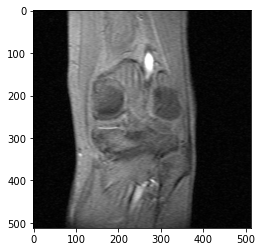

In [27]:
plt.imshow(img_normalized[7], cmap='gray')

In [28]:
itk.imwrite(img_normalized, 'img_normalized.nii.gz')